<a href="https://colab.research.google.com/github/earo12/Stock-Market-Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis






In this project we're going to Analyse and predict some data for companies like Apple, Google, Microsoft and Amazon as well.

Here, we're going to apply some different techniques like LSTM and so on in order to make it more readible!

As usual we have to load all the libraries we're going to use:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

# libraries used for the model
from keras.models import Sequential
from keras.layers import Dense, LSTM

Now, I'm gonna define some lists that are related with the categories of some companies like Google, Apple, Microsoft and Amazon.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,104.040001,105.389999,103.309998,104.000000,104.000000,45345500,AMAZON
2023-05-05,104.269997,105.760002,103.550003,105.660004,105.660004,56912900,AMAZON
2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49430900,AMAZON
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400,AMAZON
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600,AMAZON
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800,AMAZON
2023-05-12,112.160004,112.639999,109.320000,110.260002,110.260002,49810100,AMAZON
2023-05-15,111.150002,112.290001,109.250000,111.199997,111.199997,53011100,AMAZON
2023-05-16,111.050003,114.790001,111.050003,113.400002,113.400002,71290700,AMAZON


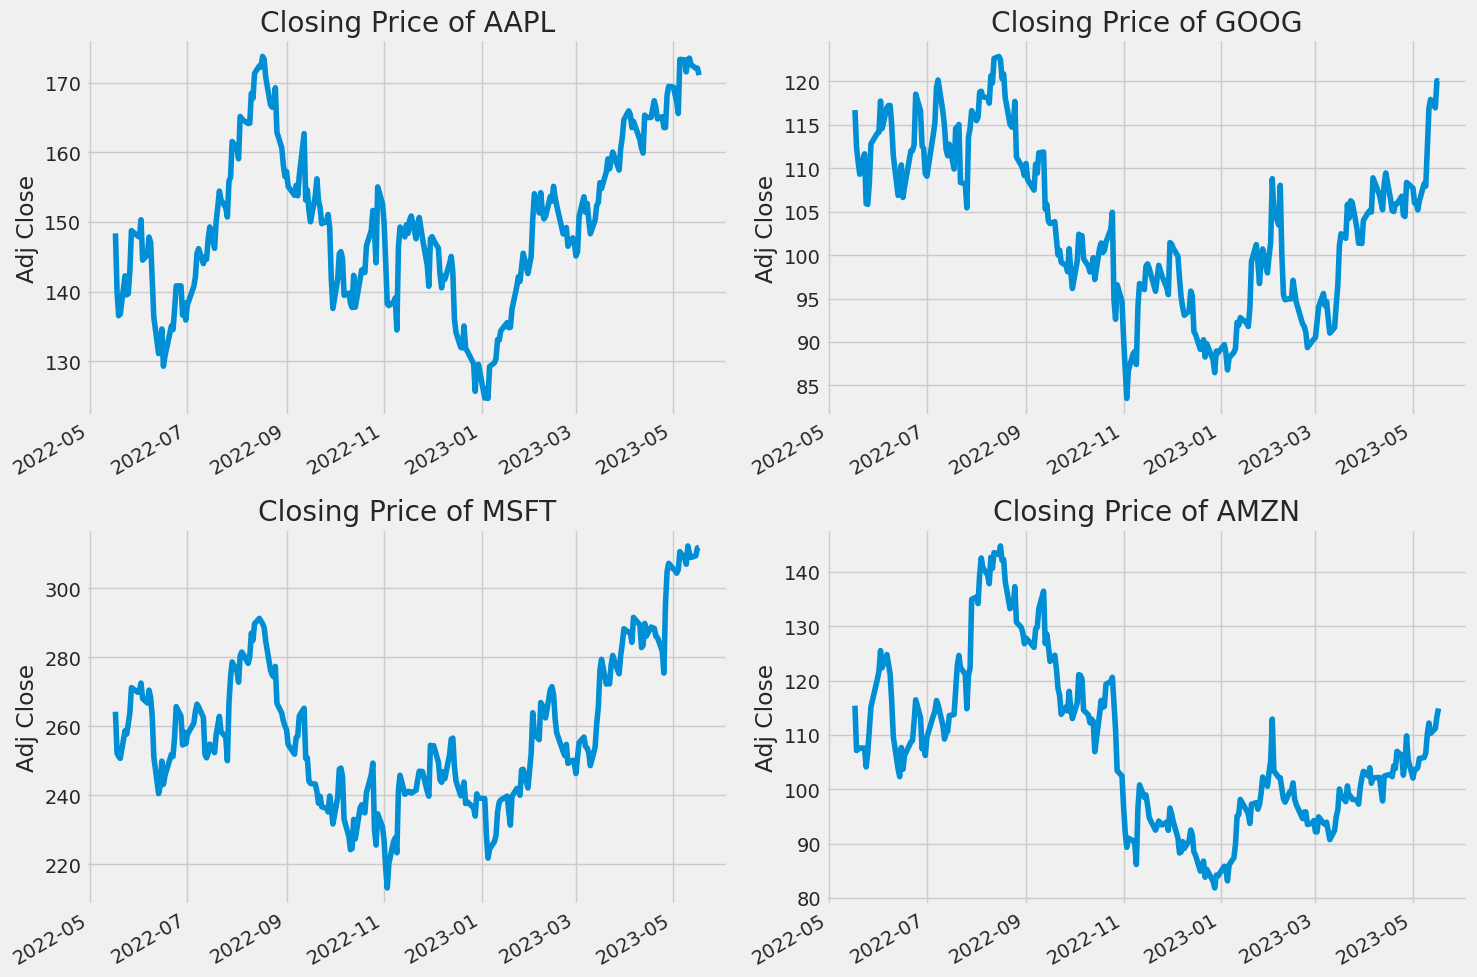

In [3]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

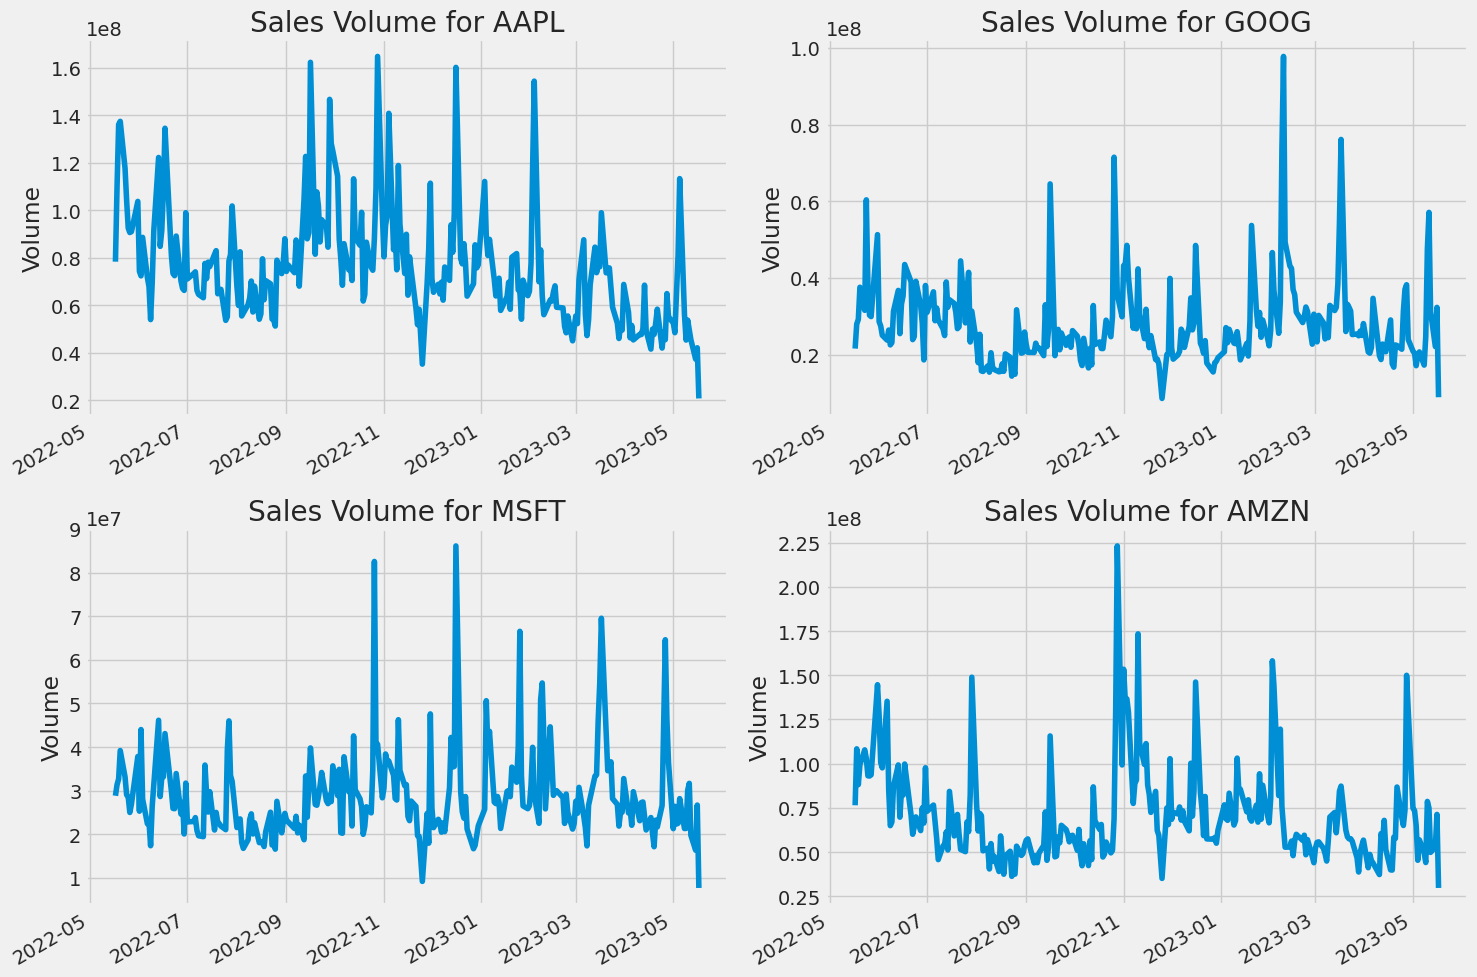

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

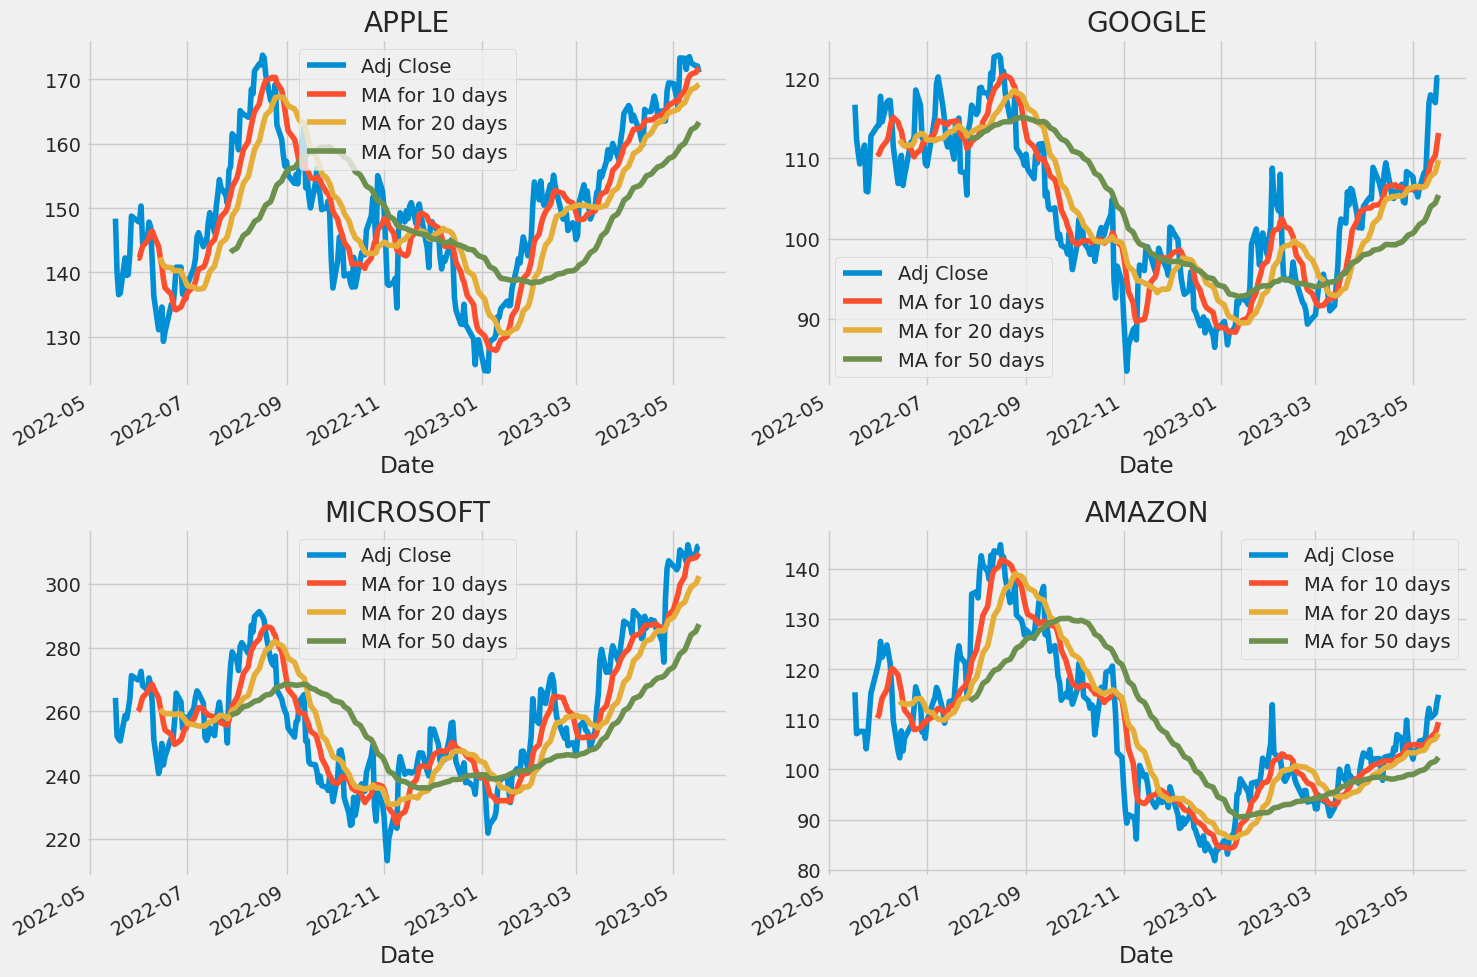

In [5]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

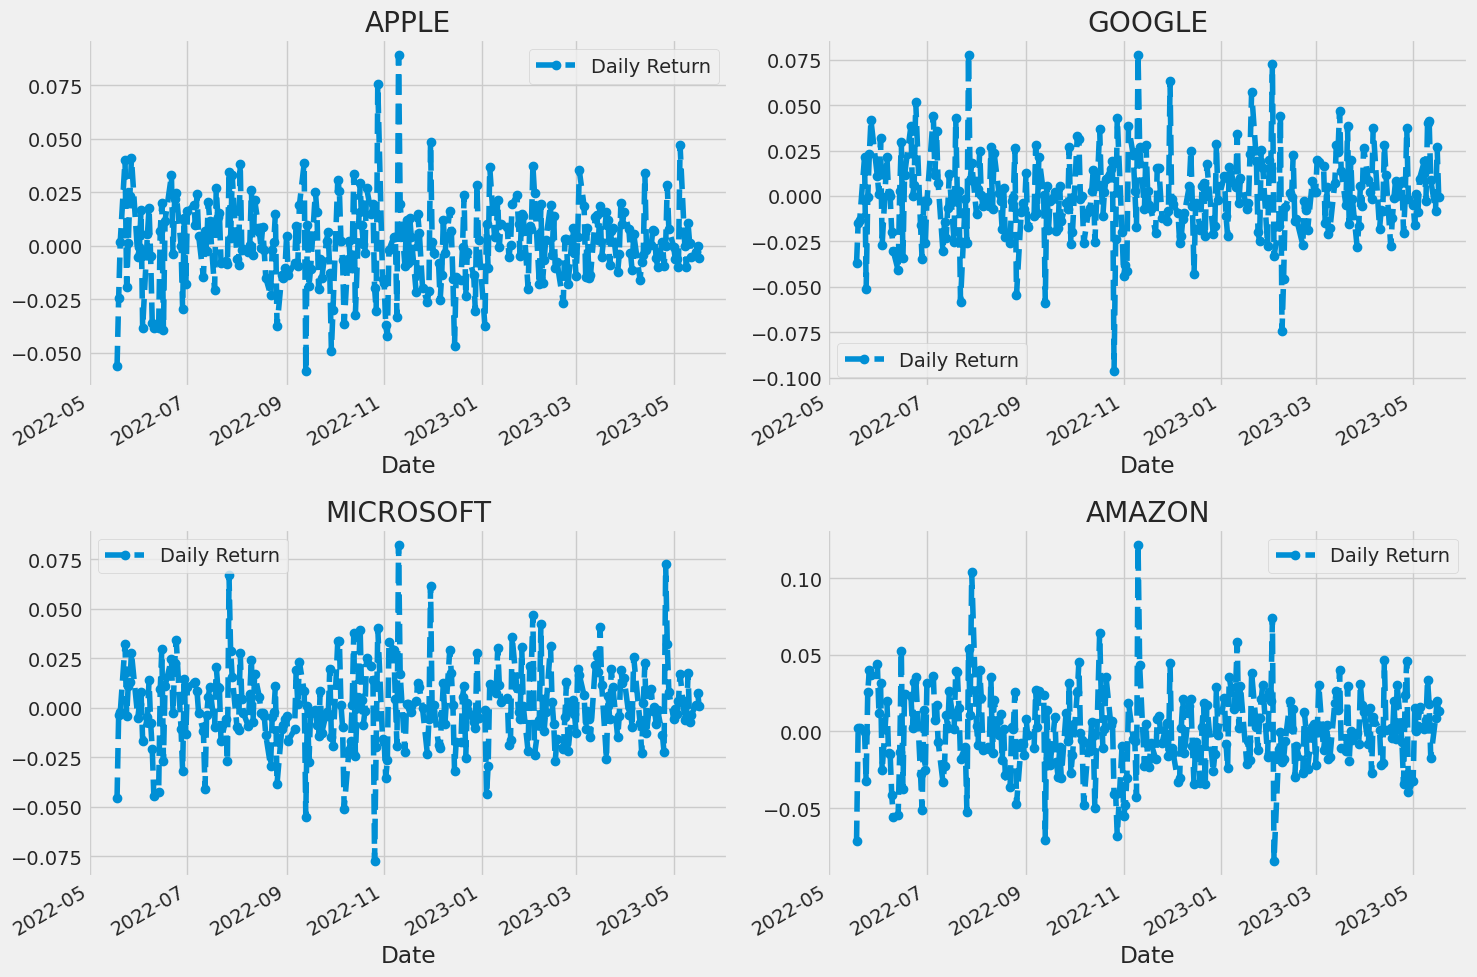

In [6]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

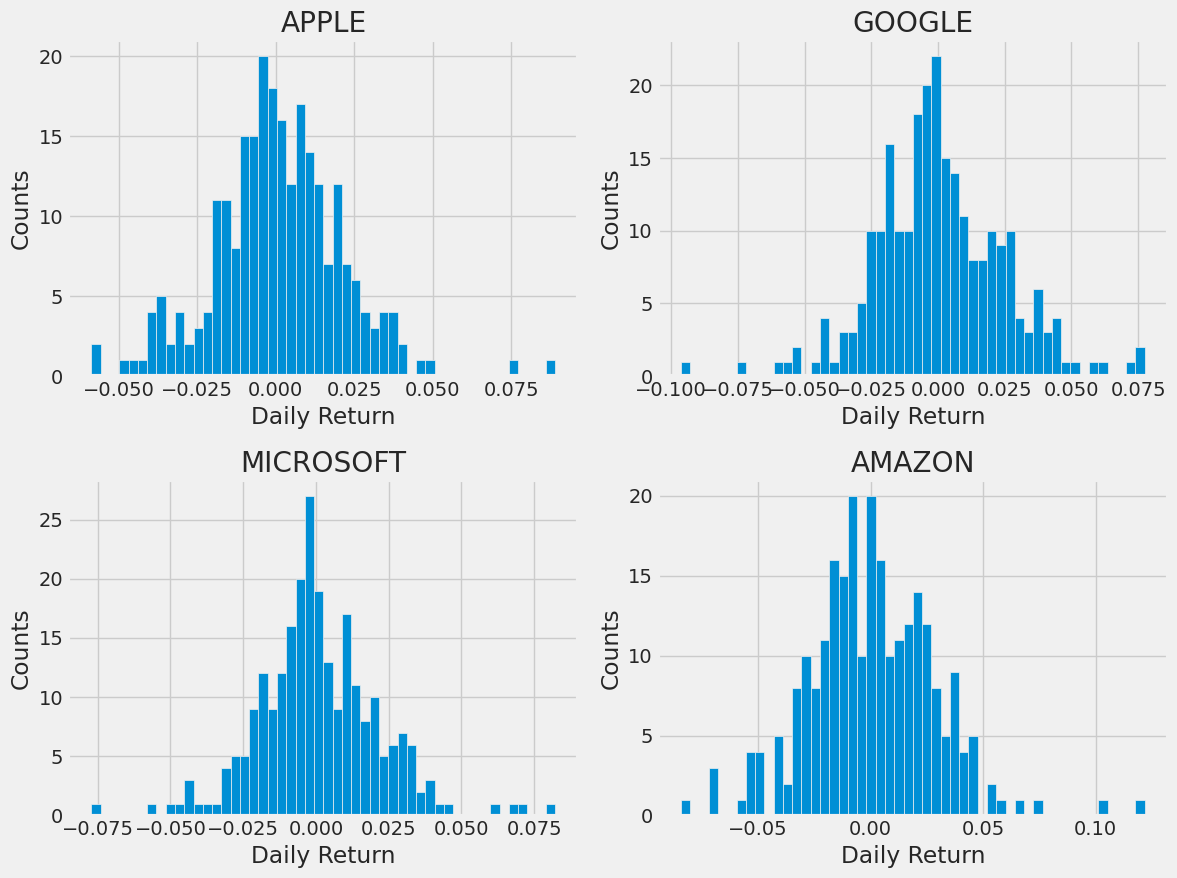

In [7]:
#histogram

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [8]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-17,NaN,NaN,NaN,NaN
2022-05-18,-0.056419,-0.071562,-0.036850,-0.045530
2022-05-19,-0.024641,0.001928,-0.014729,-0.003700
2022-05-20,0.001747,0.002535,-0.012935,-0.002291
2022-05-23,0.040119,-0.000316,0.021530,0.032032


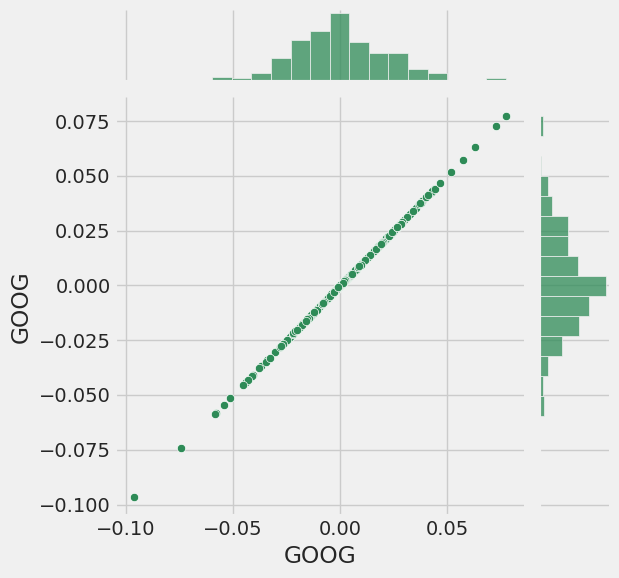

In [9]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

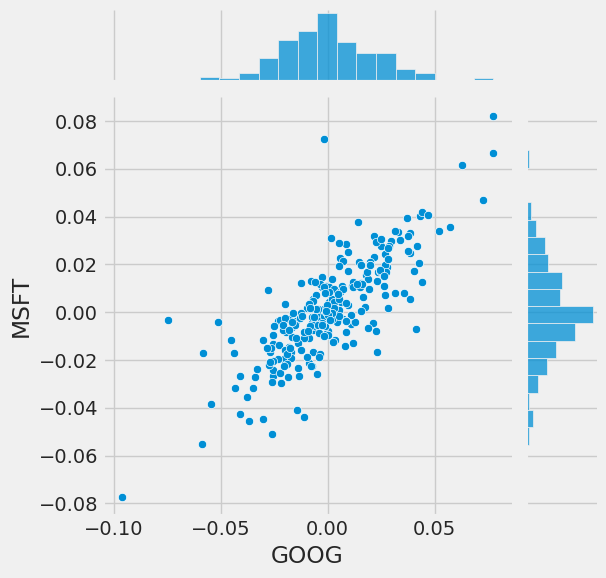

In [10]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


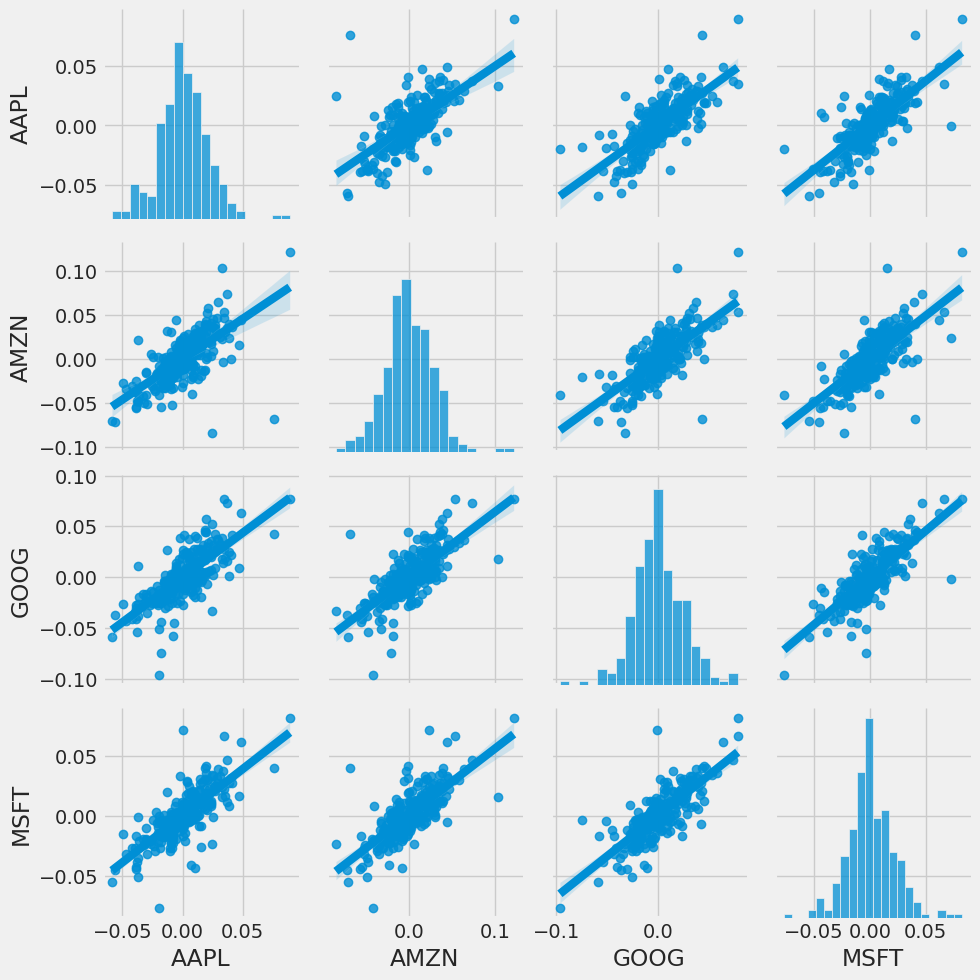

In [11]:
sns.pairplot(tech_rets, kind = 'reg')

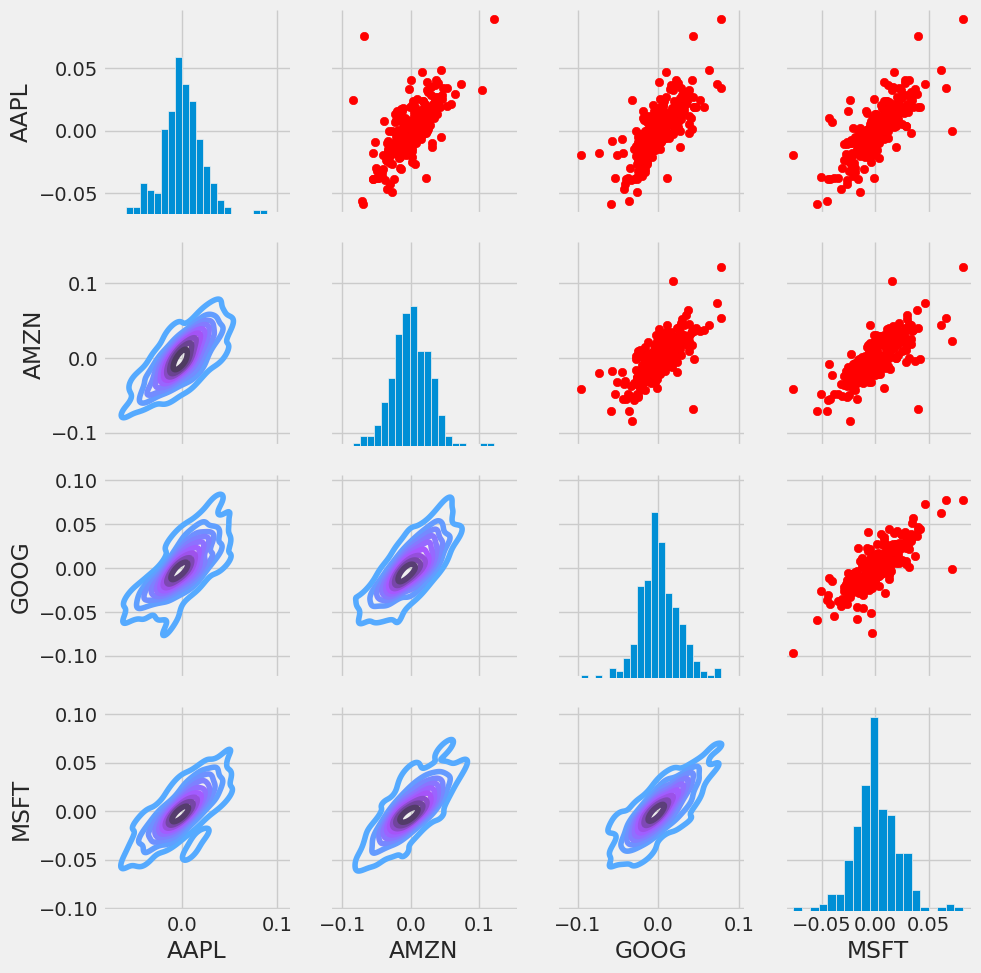

In [12]:
my_fig = sns.PairGrid(tech_rets.dropna())
my_fig.map_upper(plt.scatter, color = 'red')
my_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
my_fig.map_diag(plt.hist, bins = 20)

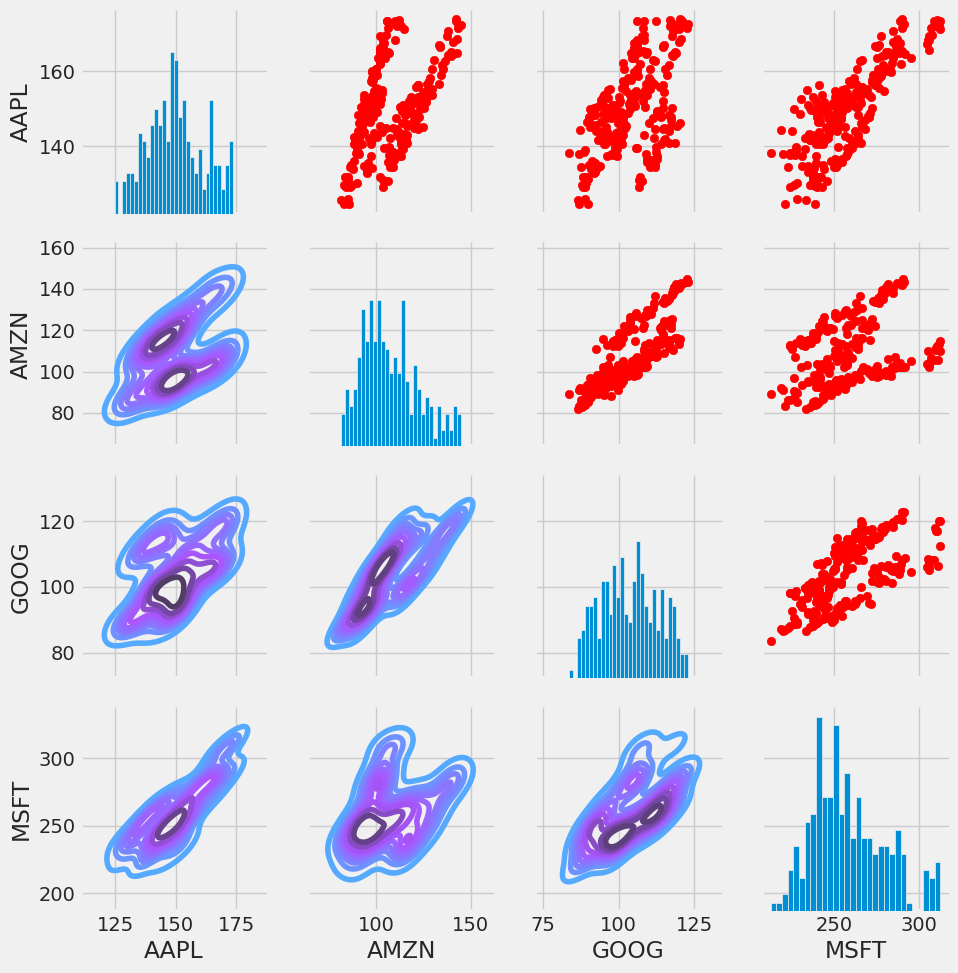

In [13]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

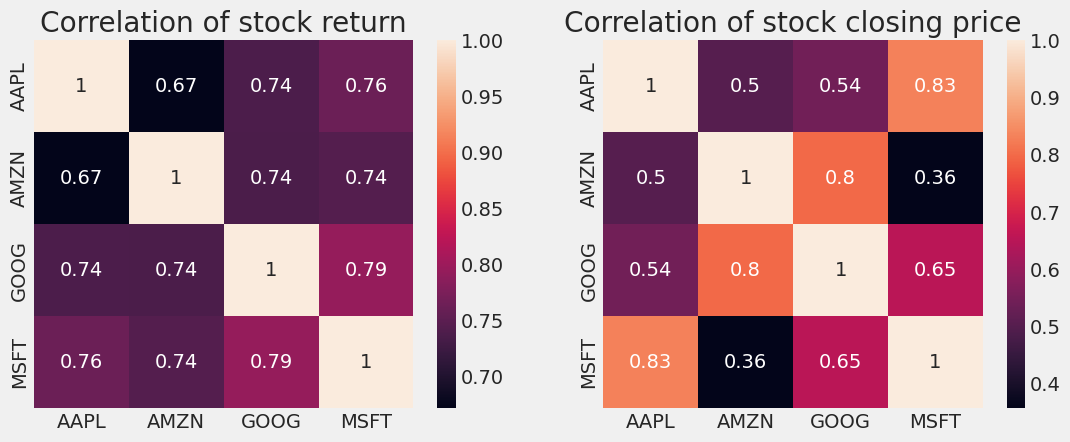

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Correlation of stock closing price')

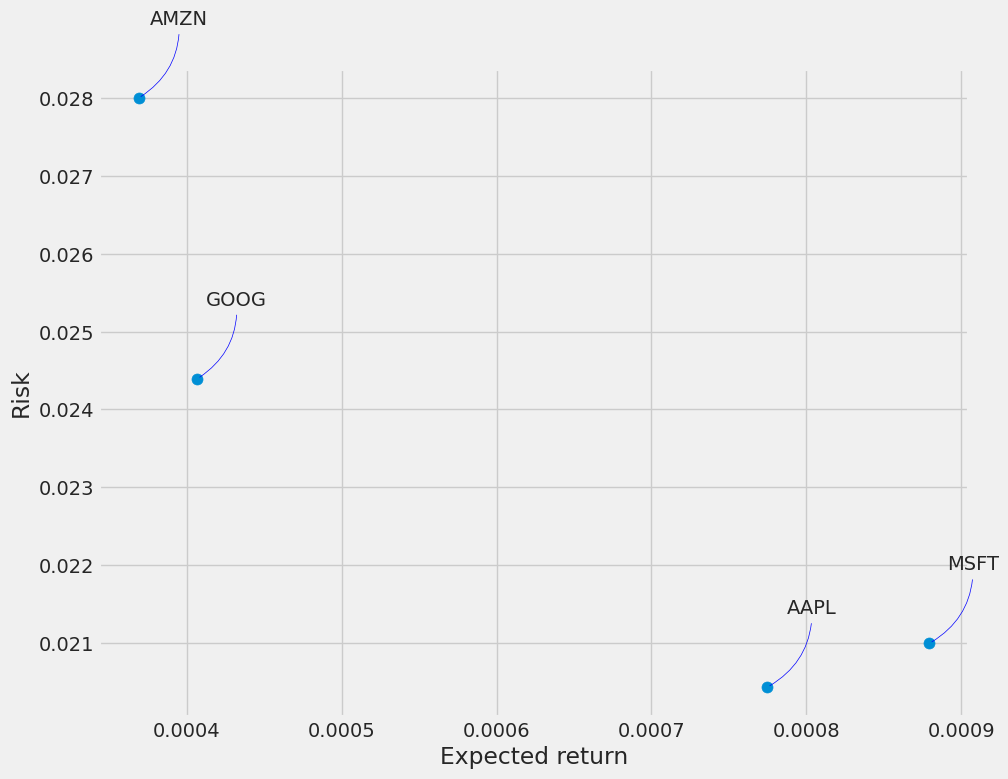

In [15]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [16]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482924,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550008,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689344,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821993,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801655,394024400
...,...,...,...,...,...,...
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800
2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700


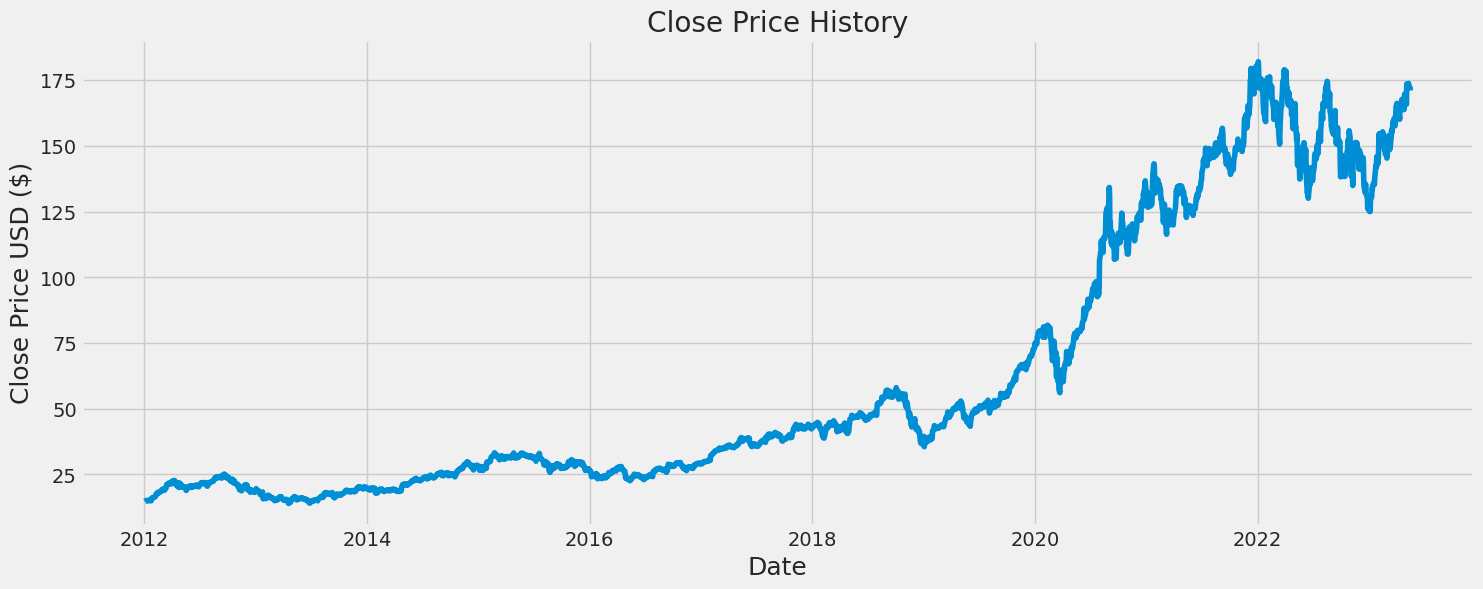

In [17]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [18]:
data = df.filter(['Close'])
data_ = data.values

In [19]:
train_data_ = int(np.ceil(len(data_) * 0.95))
train_data_

2719

In [20]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data_)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.94085541],
       [0.94085541],
       [0.93466955]])

In [21]:
train_data = scaled_data[0:int(train_data_), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
    #    print(x_train)
    #    print(y_train)
    #    print()

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))       

In [22]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2659/2659 [==============================] - 120s 44ms/step - loss: 0.0013


In [25]:
test_data = scaled_data[train_data_ - 60: , :]


In [26]:
x_test = []
y_test = data_[train_data_:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [27]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 36ms/step


In [29]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

6.980142596330605


In [30]:
train = df[:train_data_]

In [31]:
valid = df[train_data_:]

In [32]:
valid

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.599182,86548600
2022-10-24,147.190002,150.229996,146.000000,149.449997,148.769257,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,151.646103,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,148.669708,88194300
2022-10-27,148.070007,149.050003,144.130005,144.800003,144.140442,109180200
...,...,...,...,...,...,...
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800
2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700


In [33]:
valid['predictions'] = predictions

<ipython-input-33-add9aff4bf78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


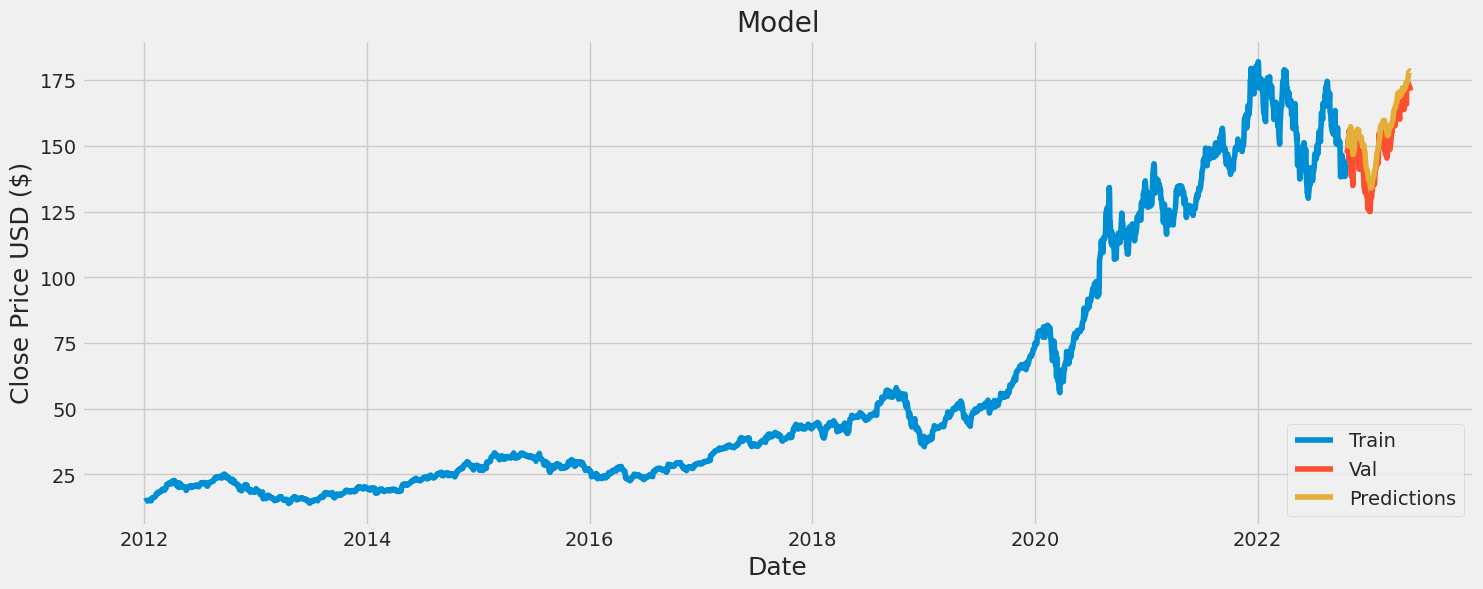

In [34]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
print(valid)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-21  142.869995  147.850006  142.649994  147.270004  146.599182   
2022-10-24  147.190002  150.229996  146.000000  149.449997  148.769257   
2022-10-25  150.089996  152.490005  149.360001  152.339996  151.646103   
2022-10-26  150.960007  151.990005  148.039993  149.350006  148.669708   
2022-10-27  148.070007  149.050003  144.130005  144.800003  144.140442   
...                ...         ...         ...         ...         ...   
2023-05-11  173.850006  174.589996  172.169998  173.750000  173.510010   
2023-05-12  173.619995  174.059998  171.000000  172.570007  172.570007   
2023-05-15  173.160004  173.210007  171.470001  172.070007  172.070007   
2023-05-16  171.990005  173.139999  171.800003  172.070007  172.070007   
2023-05-17  171.710007  172.149994  170.421997  171.030396  171.030396   

               Volume  predictions  
